In [9]:
if __name__ == '__main__':
    import sys
    import os
    from pathlib import Path
    curr_file_path = Path(os.path.abspath(''))
    sys.path.append(str(curr_file_path.parent))

import numpy as np
import glob2 as glob
import matplotlib as mpl
import matplotlib.pyplot as plt
from aux_funcs import format_plot

AVERAGING_SIZE = 20

plt.rcParams['font.family'] = 'Helvetica Light'

In [23]:
def load_data(data_path, averaging_size=AVERAGING_SIZE):
    file_names = glob.glob(data_path)
    data = []
    for file_name in file_names:
        data_for_file = np.load(file_name)
        data.append(data_for_file)
    data = np.concatenate(data, axis=1)
    reduced_data = np.empty((data.shape[0], int(data.shape[1] / averaging_size)))
    for k in range(0, int(data.shape[1] / averaging_size) * averaging_size, averaging_size):
        reduced_data[:, int(k / averaging_size)] = data[:, k:k + averaging_size].mean(axis=1)
    return reduced_data
    

Axes(0.125,0.11;0.775x0.77)


C:\Users\david.bell\AppData\Local\Temp\ipykernel_27960\1034648714.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axs.scatter(s, pr_disc, c=cmap(reward_param / 50))


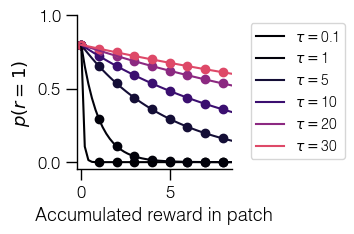

In [11]:
scale = 0.5
fig, axs = plt.subplots(1, 1, figsize=(4 * scale, 4 * scale))

cmap = mpl.colormaps['magma']

s = np.arange(0, 20)
x = np.linspace(0, 20, 100)
a = 0.8

for i, reward_param in enumerate([0.1, 1, 5, 10, 20, 30]):
    pr_disc = a * np.exp(-s/reward_param)
    pr_cont = a * np.exp(-x/reward_param)
    axs.plot(x, pr_cont, label=r'$\tau = $' + f'{reward_param}', c=cmap(reward_param / 50))
    axs.scatter(s, pr_disc, c=cmap(reward_param / 50))

axs.set_ylabel(r'$p(r=1)$', fontsize=13)
axs.set_xlabel('Accumulated reward in patch')
axs.set_xlim(-0.25, 8.5)
axs.set_ylim(-0.05, 1)
format_plot(axs)
fig.legend(bbox_to_anchor=(1.5, 0.875))



Axes(0.125,0.11;0.775x0.77)


C:\Users\david.bell\AppData\Local\Temp\ipykernel_27960\112812220.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axs.scatter(s, pr_disc, c=cmap(reward_param / 50))


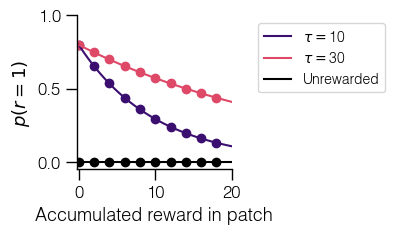

In [12]:
scale = 0.5
fig, axs = plt.subplots(1, 1, figsize=(4 * scale, 4 * scale))

cmap = mpl.colormaps['magma']

s = np.arange(0, 20, 2)
x = np.linspace(0, 20, 100)
a = 0.8

for i, reward_param in enumerate([10, 30]):
    pr_disc = a * np.exp(-s/reward_param)
    pr_cont = a * np.exp(-x/reward_param)
    axs.plot(x, pr_cont, label=r'$\tau = $' + f'{reward_param}', c=cmap(reward_param / 50))
    axs.scatter(s, pr_disc, c=cmap(reward_param / 50))

axs.plot(x, [0] * len(x), c='black', label='Unrewarded')
axs.scatter(s, [0] * len(s), c='black')

axs.set_ylabel(r'$p(r=1)$', fontsize=13)
axs.set_xlabel('Accumulated reward in patch')
axs.set_xlim(-0.25, 20)
axs.set_ylim(-0.05, 1)
format_plot(axs)
fig.legend(bbox_to_anchor=(1.7, 0.875))


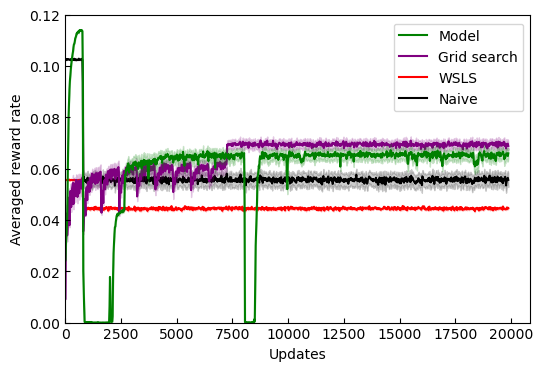

In [157]:
data_dir = '../data/rl_agent_outputs/det_reward_to_stoch_long_trials_max_reward_decay_30_2024-08-29_17_06_50_928811/reward_rates'
reduced_data = load_data(os.path.join(data_dir, '*.npy'))

scale = 1
fig, axs = plt.subplots(1, 1, figsize=(6 * scale, 4 * scale))

axs.fill_between(
    np.arange(reduced_data.shape[1]) * AVERAGING_SIZE,
    np.mean(reduced_data.T, axis=1) - np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
    np.mean(reduced_data.T, axis=1) + np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
    color='green',
    alpha=0.2,
    zorder=1,
)

axs.plot(
    np.arange(reduced_data.shape[1]) * AVERAGING_SIZE,
    np.mean(reduced_data.T, axis=1),
    c='green',
    zorder=1,
    label='Model',
)

opt_data_dir = '../data/grid_search_agent_outputs/expect_reward_to_stoch_long_trials_max_reward_decay_30_2024-08-30_12_32_24_721439/reward_rates'
averaging_size = AVERAGING_SIZE
reduced_data = load_data(os.path.join(opt_data_dir, '*.npy'), averaging_size=averaging_size)

axs.fill_between(
    np.arange(reduced_data.shape[1]) * averaging_size,
    np.mean(reduced_data.T, axis=1) - np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
    np.mean(reduced_data.T, axis=1) + np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
    color='purple',
    alpha=0.2,
    zorder=0,
)

axs.plot(
    np.arange(reduced_data.shape[1]) * averaging_size,
    np.mean(reduced_data.T, axis=1),
    c='purple',
    zorder=0,
    label='Grid search',
)

# opt_data_dir = '../data/grid_search_agent_outputs/expect_reward_to_stoch_sample_period_25_2024-08-30_13_34_33_910423/reward_rates'
# averaging_size = AVERAGING_SIZE
# reduced_data = load_data(os.path.join(opt_data_dir, '*.npy'), averaging_size=averaging_size)

# axs.fill_between(
#     np.arange(reduced_data.shape[1]) * averaging_size,
#     np.mean(reduced_data.T, axis=1) - np.std(reduced_data.T, axis=1),
#     np.mean(reduced_data.T, axis=1) + np.std(reduced_data.T, axis=1),
#     color='red',
#     alpha=0.2,
#     zorder=0,
# )

# axs.plot(
#     np.arange(reduced_data.shape[1]) * averaging_size,
#     np.mean(reduced_data.T, axis=1),
#     c='red',
#     zorder=0,
# )

wsls_data_dir = '../data/wsls_agent_outputs/det_reward_to_stoch_2024-08-30_14_41_19_146891/reward_rates'
averaging_size = AVERAGING_SIZE
reduced_data = load_data(os.path.join(wsls_data_dir, '*.npy'), averaging_size=averaging_size)

axs.fill_between(
    np.arange(reduced_data.shape[1]) * averaging_size,
    np.mean(reduced_data.T, axis=1) - np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
    np.mean(reduced_data.T, axis=1) + np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
    color='red',
    alpha=0.2,
    zorder=-1,
)

axs.plot(
    np.arange(reduced_data.shape[1]) * averaging_size,
    np.mean(reduced_data.T, axis=1),
    c='red',
    zorder=-1,
    label='WSLS',
)

ctrl_data_dir = '../data/naive_agent_outputs/det_reward_to_stoch_2024-08-30_15_11_25_031678/reward_rates'
averaging_size = AVERAGING_SIZE
reduced_data = load_data(os.path.join(ctrl_data_dir, '*.npy'), averaging_size=averaging_size)

axs.fill_between(
    np.arange(reduced_data.shape[1]) * averaging_size,
    np.mean(reduced_data.T, axis=1) - np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
    np.mean(reduced_data.T, axis=1) + np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
    color='black',
    alpha=0.2,
    zorder=-2,
)

axs.plot(
    np.arange(reduced_data.shape[1]) * averaging_size,
    np.mean(reduced_data.T, axis=1),
    c='black',
    zorder=-2,
    label='Naive',
)

axs.set_ylim(0, 0.12)
axs.set_xlim(0)
axs.set_ylabel('Averaged reward rate')
axs.set_xlabel('Updates')
axs.tick_params(axis='both', direction='in')
fig.legend(bbox_to_anchor=(0.9, 0.875))
print()

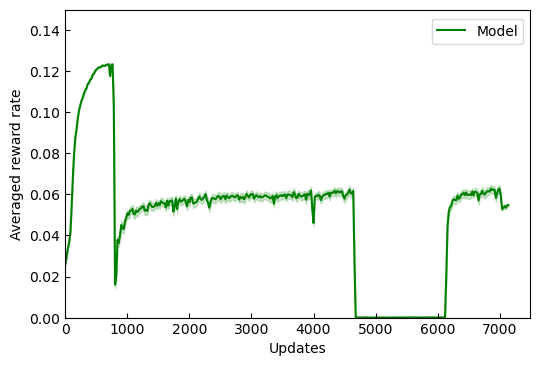

In [162]:
data_dir = '../data/rl_agent_outputs/det_reward_to_stoch_100_sites_per_p_max_reward_decay_30_2024-09-12_11_20_11_328929/reward_rates'
reduced_data = load_data(os.path.join(data_dir, '*.npy'))

scale = 1
fig, axs = plt.subplots(1, 1, figsize=(6 * scale, 4 * scale))

axs.fill_between(
    np.arange(reduced_data.shape[1]) * AVERAGING_SIZE,
    np.mean(reduced_data.T, axis=1) - np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
    np.mean(reduced_data.T, axis=1) + np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
    color='green',
    alpha=0.2,
    zorder=1,
)

axs.plot(
    np.arange(reduced_data.shape[1]) * AVERAGING_SIZE,
    np.mean(reduced_data.T, axis=1),
    c='green',
    zorder=1,
    label='Model',
)

axs.set_ylim(0, 0.15)
axs.set_xlim(0)
axs.set_ylabel('Averaged reward rate')
axs.set_xlabel('Updates')
axs.tick_params(axis='both', direction='in')
fig.legend(bbox_to_anchor=(0.9, 0.875))
print()

0.00709141875256463



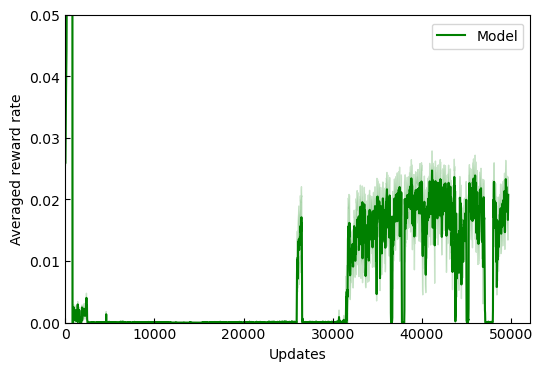

In [22]:
data_dir = '../data/rl_agent_outputs/3_distinct_levels_penalty_for_incorrect_50k_2024-10-12_09_17_28_176821_var_noise_0_activity_weight_0/reward_rates'
reduced_data = load_data(os.path.join(data_dir, '*.npy'))

scale = 1
fig, axs = plt.subplots(1, 1, figsize=(6 * scale, 4 * scale))

axs.fill_between(
    np.arange(reduced_data.shape[1]) * AVERAGING_SIZE,
    np.mean(reduced_data.T, axis=1) - np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
    np.mean(reduced_data.T, axis=1) + np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
    color='green',
    alpha=0.2,
    zorder=1,
)

axs.plot(
    np.arange(reduced_data.shape[1]) * AVERAGING_SIZE,
    np.mean(reduced_data.T, axis=1),
    c='green',
    zorder=1,
    label='Model',
)

print( np.mean(reduced_data.T, axis=1)[:-50:].mean())

axs.set_ylim(0, 0.05)
axs.set_xlim(0)
axs.set_ylabel('Averaged reward rate')
axs.set_xlabel('Updates')
axs.tick_params(axis='both', direction='in')
fig.legend(bbox_to_anchor=(0.9, 0.875))
print()

0.014711090909090913



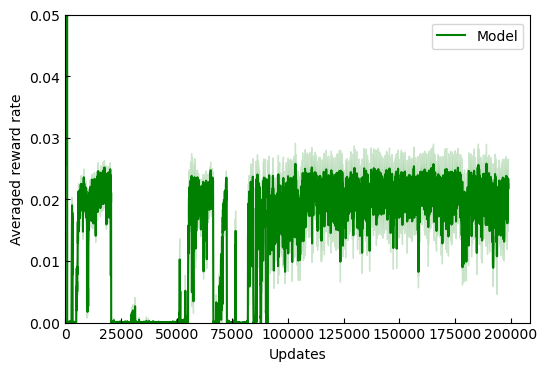

In [44]:
data_dir = '../data/rl_agent_outputs/punish_no_reward_200k_2024-10-14_12_07_40_801312_var_noise_0_activity_weight_0/reward_rates'
reduced_data = load_data(os.path.join(data_dir, '*.npy'))

scale = 1
fig, axs = plt.subplots(1, 1, figsize=(6 * scale, 4 * scale))

axs.fill_between(
    np.arange(reduced_data.shape[1]) * AVERAGING_SIZE,
    np.mean(reduced_data.T, axis=1) - np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
    np.mean(reduced_data.T, axis=1) + np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
    color='green',
    alpha=0.2,
    zorder=1,
)

axs.plot(
    np.arange(reduced_data.shape[1]) * AVERAGING_SIZE,
    np.mean(reduced_data.T, axis=1),
    c='green',
    zorder=1,
    label='Model',
)

print( np.mean(reduced_data.T, axis=1)[:-50:].mean())

axs.set_ylim(0, 0.05)
axs.set_xlim(0)
axs.set_ylabel('Averaged reward rate')
axs.set_xlabel('Updates')
axs.tick_params(axis='both', direction='in')
fig.legend(bbox_to_anchor=(0.9, 0.875))
print()

0.001490152846957711



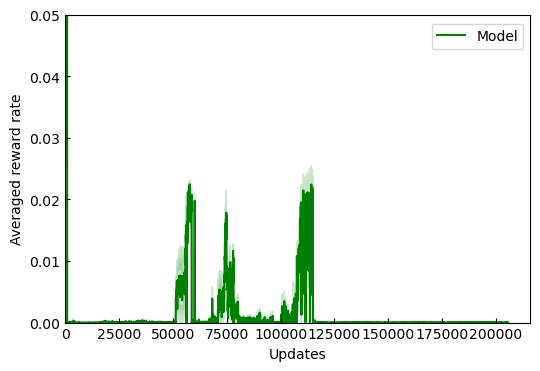

In [50]:
data_dir = '../data/rl_agent_outputs/punish_no_reward_long_sesh_500k_2024-10-17_16_07_22_331446_var_noise_0_activity_weight_0/reward_rates'
reduced_data = load_data(os.path.join(data_dir, '*.npy'))

scale = 1
fig, axs = plt.subplots(1, 1, figsize=(6 * scale, 4 * scale))

axs.fill_between(
    np.arange(reduced_data.shape[1]) * AVERAGING_SIZE,
    np.mean(reduced_data.T, axis=1) - np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
    np.mean(reduced_data.T, axis=1) + np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
    color='green',
    alpha=0.2,
    zorder=1,
)

axs.plot(
    np.arange(reduced_data.shape[1]) * AVERAGING_SIZE,
    np.mean(reduced_data.T, axis=1),
    c='green',
    zorder=1,
    label='Model',
)

print( np.mean(reduced_data.T, axis=1)[:-50:].mean())

axs.set_ylim(0, 0.05)
axs.set_xlim(0)
axs.set_ylabel('Averaged reward rate')
axs.set_xlabel('Updates')
axs.tick_params(axis='both', direction='in')
fig.legend(bbox_to_anchor=(0.9, 0.875))
print()

0.0102228



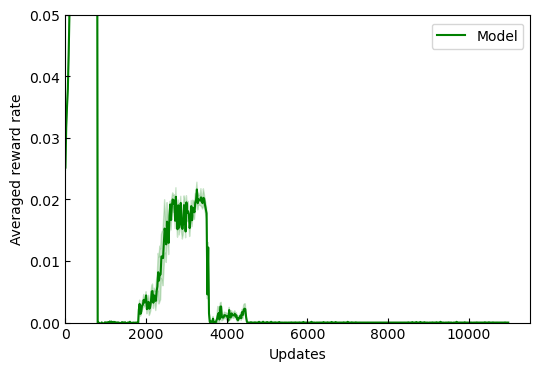

In [58]:
data_dir = '../data/rl_agent_outputs/punish_no_reward_long_sesh_500k_2024-10-21_11_19_47_461666_var_noise_0_activity_weight_0/reward_rates'
reduced_data = load_data(os.path.join(data_dir, '*.npy'))

scale = 1
fig, axs = plt.subplots(1, 1, figsize=(6 * scale, 4 * scale))

axs.fill_between(
    np.arange(reduced_data.shape[1]) * AVERAGING_SIZE,
    np.mean(reduced_data.T, axis=1) - np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
    np.mean(reduced_data.T, axis=1) + np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
    color='green',
    alpha=0.2,
    zorder=1,
)

axs.plot(
    np.arange(reduced_data.shape[1]) * AVERAGING_SIZE,
    np.mean(reduced_data.T, axis=1),
    c='green',
    zorder=1,
    label='Model',
)

print( np.mean(reduced_data.T, axis=1)[:-50:].mean())

axs.set_ylim(0, 0.05)
axs.set_xlim(0)
axs.set_ylabel('Averaged reward rate')
axs.set_xlabel('Updates')
axs.tick_params(axis='both', direction='in')
fig.legend(bbox_to_anchor=(0.9, 0.875))
print()

0.002590940822111978



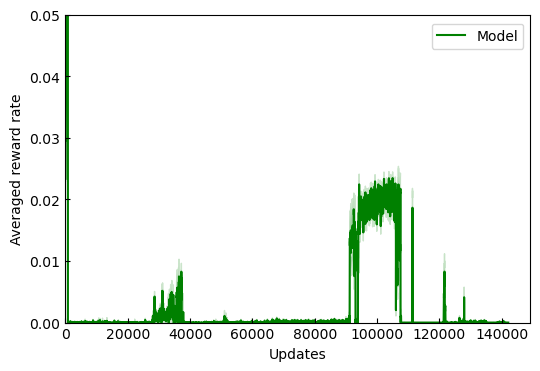

In [70]:
data_dir = '../data/rl_agent_outputs/punish_no_reward_long_sesh_500k_2024-10-21_13_31_20_988555_var_noise_0_activity_weight_0/reward_rates'
reduced_data = load_data(os.path.join(data_dir, '*.npy'))

scale = 1
fig, axs = plt.subplots(1, 1, figsize=(6 * scale, 4 * scale))

axs.fill_between(
    np.arange(reduced_data.shape[1]) * AVERAGING_SIZE,
    np.mean(reduced_data.T, axis=1) - np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
    np.mean(reduced_data.T, axis=1) + np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
    color='green',
    alpha=0.2,
    zorder=1,
)

axs.plot(
    np.arange(reduced_data.shape[1]) * AVERAGING_SIZE,
    np.mean(reduced_data.T, axis=1),
    c='green',
    zorder=1,
    label='Model',
)

print( np.mean(reduced_data.T, axis=1)[:-50:].mean())

axs.set_ylim(0, 0.05)
axs.set_xlim(0)
axs.set_ylabel('Averaged reward rate')
axs.set_xlabel('Updates')
axs.tick_params(axis='both', direction='in')
fig.legend(bbox_to_anchor=(0.9, 0.875))
print()

0.057054545951859964



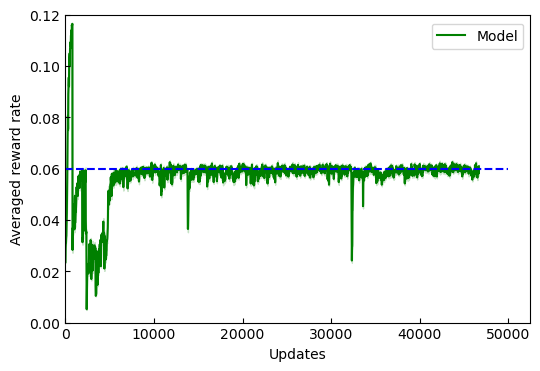

In [6]:
data_dir = '../data/rl_agent_outputs/long_sesh_500k_2024-10-25_13_15_42_715803_var_noise_0_activity_weight_0/reward_rates'
reduced_data = load_data(os.path.join(data_dir, '*.npy'))

scale = 1
fig, axs = plt.subplots(1, 1, figsize=(6 * scale, 4 * scale))

axs.fill_between(
    np.arange(reduced_data.shape[1]) * AVERAGING_SIZE,
    np.mean(reduced_data.T, axis=1) - np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
    np.mean(reduced_data.T, axis=1) + np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
    color='green',
    alpha=0.2,
    zorder=1,
)

axs.plot(
    np.arange(reduced_data.shape[1]) * AVERAGING_SIZE,
    np.mean(reduced_data.T, axis=1),
    c='green',
    zorder=1,
    label='Model',
)

axs.plot([0, 50000], [0.06, 0.06], '--', c='blue')

print( np.mean(reduced_data.T, axis=1)[:-50:].mean())

axs.set_ylim(0, 0.12)
axs.set_xlim(0)
axs.set_ylabel('Averaged reward rate')
axs.set_xlabel('Updates')
axs.tick_params(axis='both', direction='in')
fig.legend(bbox_to_anchor=(0.9, 0.875))
print()

In [ ]:
data_dir = '../data/rl_agent_outputs/long_sesh_500k_2024-10-25_13_15_42_715803_var_noise_0_activity_weight_0/reward_rates'
reduced_data = load_data(os.path.join(data_dir, '*.npy'))

scale = 1
fig, axs = plt.subplots(1, 1, figsize=(6 * scale, 4 * scale))

axs.fill_between(
    np.arange(reduced_data.shape[1]) * AVERAGING_SIZE,
    np.mean(reduced_data.T, axis=1) - np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
    np.mean(reduced_data.T, axis=1) + np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
    color='green',
    alpha=0.2,
    zorder=1,
)

axs.plot(
    np.arange(reduced_data.shape[1]) * AVERAGING_SIZE,
    np.mean(reduced_data.T, axis=1),
    c='green',
    zorder=1,
    label='Model',
)

axs.plot([0, 50000], [0.06, 0.06], '--', c='blue')

print( np.mean(reduced_data.T, axis=1)[:-50:].mean())

axs.set_ylim(0, 0.12)
axs.set_xlim(0)
axs.set_ylabel('Averaged reward rate')
axs.set_xlabel('Updates')
axs.tick_params(axis='both', direction='in')
fig.legend(bbox_to_anchor=(0.9, 0.875))
print()

0.0630625



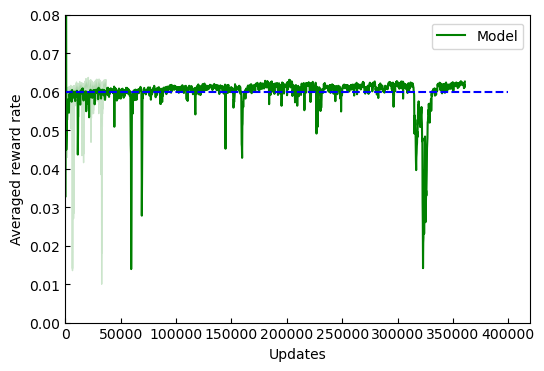

In [45]:
data_dir = '../data/rl_agent_outputs/long_sesh_2024-10-26_14_43_26_244595_var_noise_0_activity_weight_0/reward_rates'
averaging_size = 200
reduced_data = load_data(os.path.join(data_dir, '*.npy'), averaging_size=averaging_size)

scale = 1
fig, axs = plt.subplots(1, 1, figsize=(6 * scale, 4 * scale))

axs.fill_between(
    np.arange(reduced_data.shape[1]) * AVERAGING_SIZE,
    np.mean(reduced_data.T, axis=1) - np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
    np.mean(reduced_data.T, axis=1) + np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
    color='green',
    alpha=0.2,
    zorder=1,
)

axs.plot(
    np.arange(reduced_data.shape[1]) * averaging_size,
    np.mean(reduced_data.T, axis=1),
    c='green',
    zorder=1,
    label='Model',
)

axs.plot([0, 400000], [0.06, 0.06], '--', c='blue')

print( np.mean(reduced_data.T, axis=1)[100:].max())

axs.set_ylim(0, 0.08)
axs.set_xlim(0)
axs.set_ylabel('Averaged reward rate')
axs.set_xlabel('Updates')
axs.tick_params(axis='both', direction='in')
fig.legend(bbox_to_anchor=(0.9, 0.875))
print()

0.0636825
1883



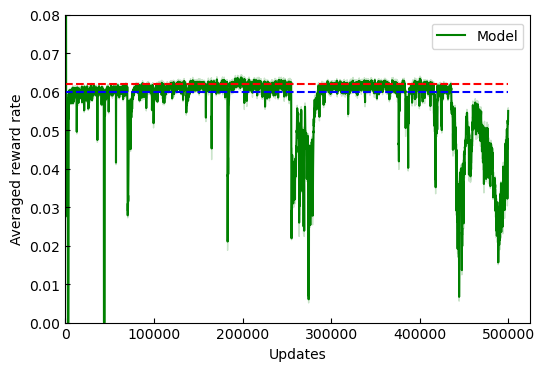

In [65]:
data_dir = '../data/rl_agent_outputs/long_sesh_mem_leak_catch_2024-10-29_16_09_59_299165_var_noise_0_activity_weight_0/reward_rates'
averaging_size = 100
reduced_data = load_data(os.path.join(data_dir, '*.npy'), averaging_size=averaging_size)

scale = 1
fig, axs = plt.subplots(1, 1, figsize=(6 * scale, 4 * scale))

axs.fill_between(
    np.arange(reduced_data.shape[1]) * averaging_size,
    np.mean(reduced_data.T, axis=1) - np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
    np.mean(reduced_data.T, axis=1) + np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
    color='green',
    alpha=0.2,
    zorder=1,
)

axs.plot(
    np.arange(reduced_data.shape[1]) * averaging_size,
    np.mean(reduced_data.T, axis=1),
    c='green',
    zorder=1,
    label='Model',
)

axs.plot([0, 500000], [0.06, 0.06], '--', c='blue')
axs.plot([0, 500000], [0.062, 0.062], '--', c='red')

print( np.mean(reduced_data.T, axis=1)[100:].max())
print( np.mean(reduced_data.T, axis=1)[100:].argmax())

axs.set_ylim(0, 0.08)
axs.set_xlim(0)
axs.set_ylabel('Averaged reward rate')
axs.set_xlabel('Updates')
axs.tick_params(axis='both', direction='in')
fig.legend(bbox_to_anchor=(0.9, 0.875))
print()

0.0609525
1276



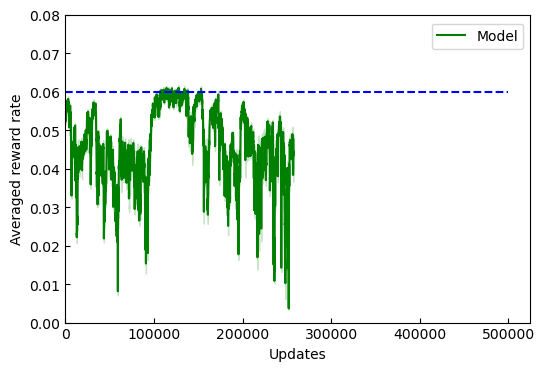

In [20]:
data_dir = '../data/rl_agent_outputs/long_sesh_mem_leak_catch_cont_2024-11-06_16_21_47_316025_var_noise_0_activity_weight_0/reward_rates'
averaging_size = 100
reduced_data = load_data(os.path.join(data_dir, '*.npy'), averaging_size=averaging_size)

scale = 1
fig, axs = plt.subplots(1, 1, figsize=(6 * scale, 4 * scale))

axs.fill_between(
    np.arange(reduced_data.shape[1]) * averaging_size,
    np.mean(reduced_data.T, axis=1) - np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
    np.mean(reduced_data.T, axis=1) + np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
    color='green',
    alpha=0.2,
    zorder=1,
)

axs.plot(
    np.arange(reduced_data.shape[1]) * averaging_size,
    np.mean(reduced_data.T, axis=1),
    c='green',
    zorder=1,
    label='Model',
)

axs.plot([0, 500000], [0.06, 0.06], '--', c='blue')

print( np.mean(reduced_data.T, axis=1).max())
print( np.mean(reduced_data.T, axis=1).argmax())

axs.set_ylim(0, 0.08)
axs.set_xlim(0)
axs.set_ylabel('Averaged reward rate')
axs.set_xlabel('Updates')
axs.tick_params(axis='both', direction='in')
fig.legend(bbox_to_anchor=(0.9, 0.875))
print()

0.11780166666666667
19



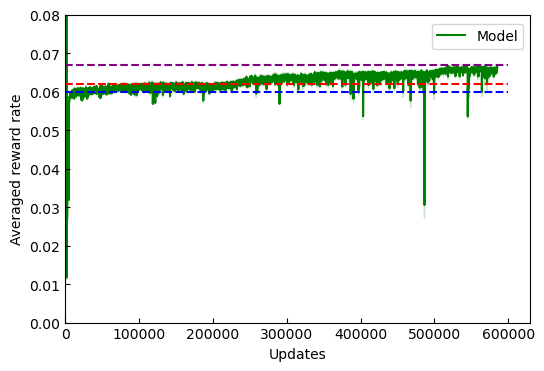

In [11]:
data_dir = '../../results/rl_agent_outputs/long_sesh_slow_learn_2024-11-08_13_25_37_996089_var_noise_0_activity_weight_0/reward_rates'
averaging_size = 100
reduced_data = load_data(os.path.join(data_dir, '*.npy'), averaging_size=averaging_size)

scale = 1
fig, axs = plt.subplots(1, 1, figsize=(6 * scale, 4 * scale))

axs.fill_between(
    np.arange(reduced_data.shape[1]) * averaging_size,
    np.mean(reduced_data.T, axis=1) - np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
    np.mean(reduced_data.T, axis=1) + np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
    color='green',
    alpha=0.2,
    zorder=1,
)

axs.plot(
    np.arange(reduced_data.shape[1]) * averaging_size,
    np.mean(reduced_data.T, axis=1),
    c='green',
    zorder=1,
    label='Model',
)

axs.plot([0, 600000], [0.06, 0.06], '--', c='blue')
axs.plot([0, 600000], [0.062, 0.062], '--', c='red')
axs.plot([0, 600000], [0.067, 0.067], '--', c='purple')

print( np.mean(reduced_data.T, axis=1).max())
print( np.mean(reduced_data.T, axis=1).argmax())

axs.set_ylim(0, 0.08)
axs.set_xlim(0)
axs.set_ylabel('Averaged reward rate')
axs.set_xlabel('Updates')
axs.tick_params(axis='both', direction='in')
fig.legend(bbox_to_anchor=(0.9, 0.875))
print()

0.06718
2848



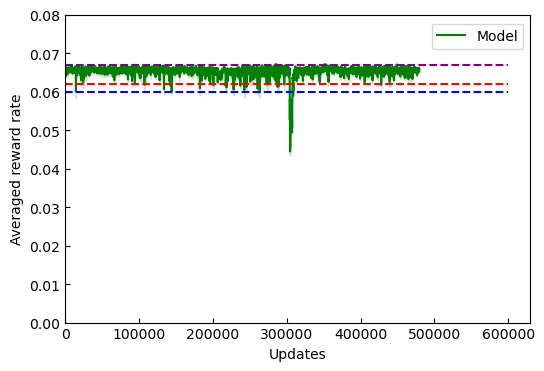

In [12]:
data_dir = '../../results/rl_agent_outputs/long_sesh_slow_learn_cont_2024-11-15_00_14_55_566253_var_noise_0_activity_weight_0/reward_rates'
averaging_size = 100
reduced_data = load_data(os.path.join(data_dir, '*.npy'), averaging_size=averaging_size)

scale = 1
fig, axs = plt.subplots(1, 1, figsize=(6 * scale, 4 * scale))

axs.fill_between(
    np.arange(reduced_data.shape[1]) * averaging_size,
    np.mean(reduced_data.T, axis=1) - np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
    np.mean(reduced_data.T, axis=1) + np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
    color='green',
    alpha=0.2,
    zorder=1,
)

axs.plot(
    np.arange(reduced_data.shape[1]) * averaging_size,
    np.mean(reduced_data.T, axis=1),
    c='green',
    zorder=1,
    label='Model',
)

axs.plot([0, 600000], [0.06, 0.06], '--', c='blue')
axs.plot([0, 600000], [0.062, 0.062], '--', c='red')
axs.plot([0, 600000], [0.067, 0.067], '--', c='purple')

print( np.mean(reduced_data.T, axis=1).max())
print( np.mean(reduced_data.T, axis=1).argmax())

axs.set_ylim(0, 0.08)
axs.set_xlim(0)
axs.set_ylabel('Averaged reward rate')
axs.set_xlabel('Updates')
axs.tick_params(axis='both', direction='in')
fig.legend(bbox_to_anchor=(0.9, 0.875))
print()

0.0844046666666667
1


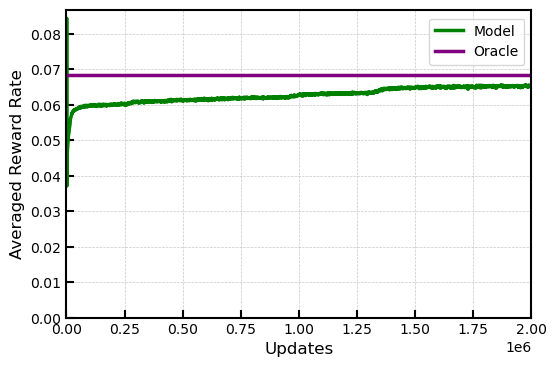

In [26]:
data_dir = '../../results/rl_agent_outputs/structural_priors_in_rl_low_noise_optim_01_2024-12-04_22_52_55_172250_var_noise_0.0001_activity_weight_1.0/reward_rates'
averaging_size = 1000
reduced_data = load_data(os.path.join(data_dir, '*.npy'), averaging_size=averaging_size)

scale = 1
fig, axs = plt.subplots(1, 1, figsize=(6 * scale, 4 * scale))

# Plot shaded region for standard error
axs.fill_between(
    np.arange(reduced_data.shape[1]) * averaging_size,
    np.mean(reduced_data.T, axis=1) - np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
    np.mean(reduced_data.T, axis=1) + np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
    color='green',
    alpha=0.2,
    zorder=1,
)

# Plot mean line
axs.plot(
    np.arange(reduced_data.shape[1]) * averaging_size,
    np.mean(reduced_data.T, axis=1),
    c='green',
    linewidth=2.5,  # Thicker plot line
    zorder=2,
    label='Model',
)

# Plot mean line
axs.plot(
    [0, 2e6],
    0.0685 * np.ones(2),
    c='purple',
    linewidth=2.5,  # Thicker plot line
    zorder=2,
    label='Oracle',
)

# Adjust axes limits
axs.set_xlim(0, 2e6)
axs.set_ylim(0)
# Add labels and titles
axs.set_ylabel('Averaged Reward Rate', fontsize=12)
axs.set_xlabel('Updates', fontsize=12)

# Customize tick parameters
axs.tick_params(axis='both', direction='in', length=6, width=1.5, labelsize=10)

# Thicken the axes lines
axs.spines['top'].set_linewidth(1.5)
axs.spines['right'].set_linewidth(1.5)
axs.spines['bottom'].set_linewidth(1.5)
axs.spines['left'].set_linewidth(1.5)

# Add grid for better readability
axs.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add legend
fig.legend(bbox_to_anchor=(0.9, 0.875), fontsize=10)

# Print stats
print(np.mean(reduced_data.T, axis=1).max())
print(np.mean(reduced_data.T, axis=1).argmax())

0.10113666666666668
19


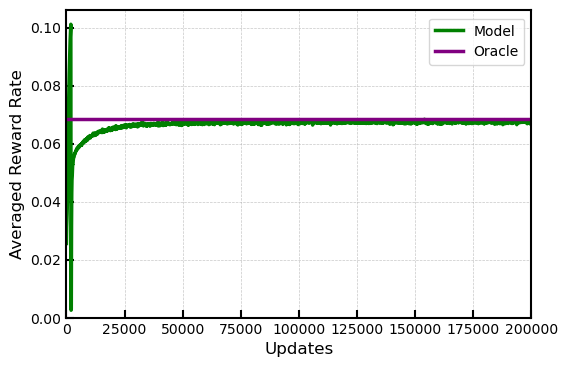

In [29]:
data_dir = '../../results/rl_agent_outputs/structural_priors_in_rl_fixed_curr_optim_02_2024-12-04_22_56_50_041229_var_noise_0.0001_activity_weight_1.0/reward_rates'
averaging_size = 100
reduced_data = load_data(os.path.join(data_dir, '*.npy'), averaging_size=averaging_size)

scale = 1
fig, axs = plt.subplots(1, 1, figsize=(6 * scale, 4 * scale))

# Plot shaded region for standard error
axs.fill_between(
    np.arange(reduced_data.shape[1]) * averaging_size,
    np.mean(reduced_data.T, axis=1) - np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
    np.mean(reduced_data.T, axis=1) + np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
    color='green',
    alpha=0.2,
    zorder=1,
)

# Plot mean line
axs.plot(
    np.arange(reduced_data.shape[1]) * averaging_size,
    np.mean(reduced_data.T, axis=1),
    c='green',
    linewidth=2.5,  # Thicker plot line
    zorder=2,
    label='Model',
)

axs.plot(
    [0, 0.2e6],
    0.0685 * np.ones(2),
    c='purple',
    linewidth=2.5,  # Thicker plot line
    zorder=2,
    label='Oracle',
)

# Adjust axes limits
axs.set_xlim(0, 0.2e6)
axs.set_ylim(0)

# Add labels and titles
axs.set_ylabel('Averaged Reward Rate', fontsize=12)
axs.set_xlabel('Updates', fontsize=12)

# Customize tick parameters
axs.tick_params(axis='both', direction='in', length=6, width=1.5, labelsize=10)

# Thicken the axes lines
axs.spines['top'].set_linewidth(1.5)
axs.spines['right'].set_linewidth(1.5)
axs.spines['bottom'].set_linewidth(1.5)
axs.spines['left'].set_linewidth(1.5)

# Add grid for better readability
axs.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add legend
fig.legend(bbox_to_anchor=(0.9, 0.875), fontsize=10)

# Print stats
print(np.mean(reduced_data.T, axis=1).max())
print(np.mean(reduced_data.T, axis=1).argmax())


0.11418166666666667
19


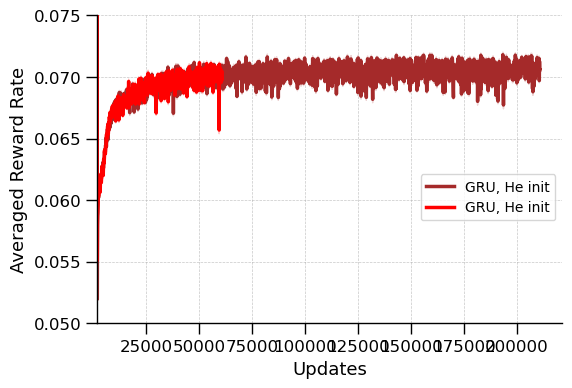

In [14]:
scale = 1
fig, axs = plt.subplots(1, 1, figsize=(6 * scale, 4 * scale))

data_dirs = [
    '../../results/rl_agent_outputs/fixed_odor_acc_reward_2025-02-09_18_56_19_657542_var_noise_0.0001_activity_weight_1.0/reward_rates',
    '../../results/rl_agent_outputs/fixed_odor_acc_reward_2025-02-09_18_59_24_627895_var_noise_0.0001_activity_weight_1.0/reward_rates',
    # '../../results/rl_agent_outputs/fixed_odor_acc_reward_line_init_2025-02-10_16_20_20_667514_var_noise_0.0001_activity_weight_1/reward_rates',
    # '../../results/rl_agent_outputs/fixed_odor_acc_reward_line_plus_input_2025-02-12_18_45_39_223955_var_noise_0.0001_activity_weight_1.0/reward_rates',
    # '../../results/rl_agent_outputs/fixed_odor_acc_reward_line_plus_inp_2025-02-13_11_37_58_288427_var_noise_0.0001_activity_weight_1/reward_rates',
    # '../../results/rl_agent_outputs/fixed_odor_acc_reward_relu_2025-02-13_13_44_01_882447_var_noise_0.0001_activity_weight_1.0/reward_rates',
    # '../../results/rl_agent_outputs/fixed_odor_acc_reward_relu_2025-02-13_17_07_03_475277_var_noise_0.0001_activity_weight_1.0/reward_rates',
]

colors = [
    'brown',
    'red',
    'green',
    'blue',
    'purple',
    'black',
    'grey',
]

labels = [
    'GRU, He init',
    'GRU, He init',
    'GRU, Line init',
    'GRU, Line init plus\naligned inputs',
    'GRU, Line init plus\naligned inputs and update',
    'ReLU',
    'ReLU, Line init',
    
]

for i, data_dir in enumerate(data_dirs):
    averaging_size = 100
    reduced_data = load_data(os.path.join(data_dir, '*.npy'), averaging_size=averaging_size)
    
    # Plot shaded region for standard error
    axs.fill_between(
        np.arange(reduced_data.shape[1]) * averaging_size,
        np.mean(reduced_data.T, axis=1) - np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
        np.mean(reduced_data.T, axis=1) + np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
        color=colors[i],
        alpha=0.2,
        zorder=1,
    )
    
    # Plot mean line
    axs.plot(
        np.arange(reduced_data.shape[1]) * averaging_size,
        np.mean(reduced_data.T, axis=1),
        c=colors[i],
        linewidth=2.5,  # Thicker plot line
        zorder=2,
        label=labels[i],
    )

# axs.plot(
#     [0, 0.2e6],
#     0.0725 * np.ones(2),
#     c='purple',
#     linewidth=2.5,  # Thicker plot line
#     zorder=2,
#     label='Oracle',
# )

# Adjust axes limits
axs.set_xlim(2000)
axs.set_ylim(0.05, 0.075)
# axs.set_xscale('log')

# Add labels and titles
axs.set_ylabel('Averaged Reward Rate', fontsize=12)
axs.set_xlabel('Updates', fontsize=12)

# Add grid for better readability
axs.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
# axs.set_xticks([50000, 1000000, 150000, 200000])

# Add legend
fig.legend(bbox_to_anchor=(0.9, 0.5), fontsize=10)

# Print stats
print(np.mean(reduced_data.T, axis=1).max())
print(np.mean(reduced_data.T, axis=1).argmax())

format_plot(axs)

0.09976766666666667
1


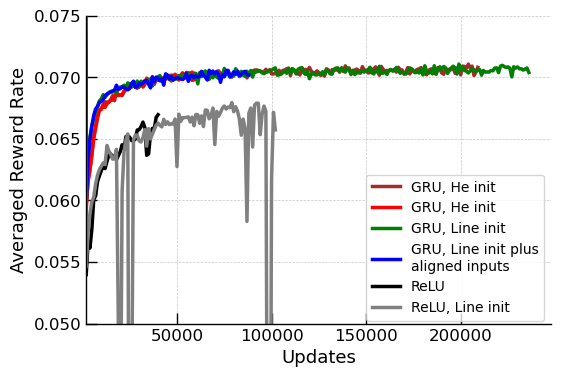

In [8]:
scale = 1
fig, axs = plt.subplots(1, 1, figsize=(6 * scale, 4 * scale))

data_dirs = [
    '../../results/rl_agent_outputs/fixed_odor_acc_reward_2025-02-09_18_56_19_657542_var_noise_0.0001_activity_weight_1.0/reward_rates',
    '../../results/rl_agent_outputs/fixed_odor_acc_reward_2025-02-09_18_59_24_627895_var_noise_0.0001_activity_weight_1.0/reward_rates',
    '../../results/rl_agent_outputs/fixed_odor_acc_reward_line_init_2025-02-10_16_20_20_667514_var_noise_0.0001_activity_weight_1/reward_rates',
    '../../results/rl_agent_outputs/fixed_odor_acc_reward_line_plus_input_2025-02-12_18_45_39_223955_var_noise_0.0001_activity_weight_1.0/reward_rates',
    # '../../results/rl_agent_outputs/fixed_odor_acc_reward_line_plus_inp_2025-02-13_11_37_58_288427_var_noise_0.0001_activity_weight_1/reward_rates',
    '../../results/rl_agent_outputs/fixed_odor_acc_reward_relu_2025-02-13_13_44_01_882447_var_noise_0.0001_activity_weight_1.0/reward_rates',
    '../../results/rl_agent_outputs/fixed_odor_acc_reward_relu_2025-02-13_17_07_03_475277_var_noise_0.0001_activity_weight_1.0/reward_rates',
]

colors = [
    'brown',
    'red',
    'green',
    'blue',
    # 'purple',
    'black',
    'grey',
]

labels = [
    'GRU, He init',
    'GRU, He init',
    'GRU, Line init',
    'GRU, Line init plus\naligned inputs',
    # 'GRU, Line init plus\naligned inputs and update',
    'ReLU',
    'ReLU, Line init',
    
]

for i, data_dir in enumerate(data_dirs):
    averaging_size = 1000
    reduced_data = load_data(os.path.join(data_dir, '*.npy'), averaging_size=averaging_size)
    
    # Plot shaded region for standard error
    axs.fill_between(
        np.arange(reduced_data.shape[1]) * averaging_size,
        np.mean(reduced_data.T, axis=1) - np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
        np.mean(reduced_data.T, axis=1) + np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
        color=colors[i],
        alpha=0.2,
        zorder=1,
    )
    
    # Plot mean line
    axs.plot(
        np.arange(reduced_data.shape[1]) * averaging_size,
        np.mean(reduced_data.T, axis=1),
        c=colors[i],
        linewidth=2.5,  # Thicker plot line
        zorder=2,
        label=labels[i],
    )

# axs.plot(
#     [0, 0.2e6],
#     0.0725 * np.ones(2),
#     c='purple',
#     linewidth=2.5,  # Thicker plot line
#     zorder=2,
#     label='Oracle',
# )

# Adjust axes limits
axs.set_xlim(2000)
axs.set_ylim(0.05, 0.075)
# axs.set_xscale('log')

# Add labels and titles
axs.set_ylabel('Averaged Reward Rate', fontsize=12)
axs.set_xlabel('Updates', fontsize=12)

# Customize tick parameters
axs.tick_params(axis='both', direction='in', length=6, width=1.5, labelsize=10)

# Thicken the axes lines
axs.spines['top'].set_linewidth(1.5)
axs.spines['right'].set_linewidth(1.5)
axs.spines['bottom'].set_linewidth(1.5)
axs.spines['left'].set_linewidth(1.5)

# Add grid for better readability
axs.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add legend
fig.legend(bbox_to_anchor=(0.9, 0.5), fontsize=10)

# Print stats
print(np.mean(reduced_data.T, axis=1).max())
print(np.mean(reduced_data.T, axis=1).argmax())

format_plot(axs)

Axes(0.125,0.11;0.775x0.77)
0.08633208333333332
0


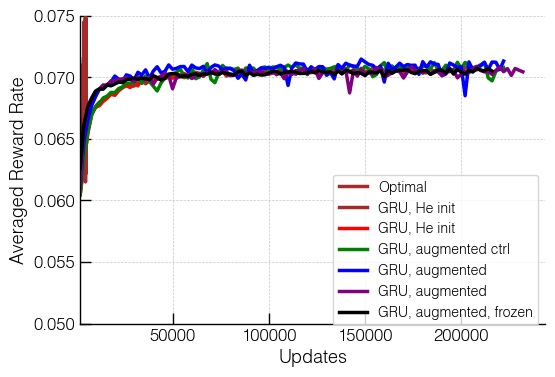

In [24]:
scale = 1
fig, axs = plt.subplots(1, 1, figsize=(6 * scale, 4 * scale))

data_dirs = [
    '../../results/rl_agent_outputs/fixed_odor_acc_reward_2025-02-09_18_56_19_657542_var_noise_0.0001_activity_weight_1.0/reward_rates',
    '../../results/rl_agent_outputs/fixed_odor_acc_reward_2025-02-09_18_59_24_627895_var_noise_0.0001_activity_weight_1.0/reward_rates',
    '../../results/rl_agent_outputs/train_augmented_rnn_2025-02-20_23_56_07_115905_var_noise_0.0001_activity_weight_1/reward_rates',
    '../../results/rl_agent_outputs/train_augmented_rnn_pretrained_2025-02-21_00_09_16_185395_var_noise_0.0001_activity_weight_1/reward_rates',
    '../../results/rl_agent_outputs/train_augmented_rnn_pretrained_2025-02-23_09_57_40_223726_var_noise_0.0001_activity_weight_1/reward_rates',
    '../../results/rl_agent_outputs/train_augmented_rnn_pretrained_frozen_2025-02-23_22_17_18_355590_var_noise_0.0001_activity_weight_1/reward_rates'
]

colors = [
    'brown',
    'red',
    'green',
    'blue',
    'purple',
    'black',
    'grey',
]

labels = [
    'GRU, He init',
    'GRU, He init',
    'GRU, augmented ctrl',
    'GRU, augmented',
    'GRU, augmented',
    'GRU, augmented, frozen',
]

baseline = '../../results/rl_agent_outputs/grid_search_test_2025-01-12_08_01_22_051999_var_noise_0_activity_weight_0/reward_rates'
reduced_data = load_data(os.path.join(baseline, '*.npy'), averaging_size=1)

# Plot mean line
axs.plot(
    np.arange(reduced_data.shape[1]) * 1,
    np.mean(reduced_data.T, axis=1),
    c=colors[i],
    linewidth=2.5,  # Thicker plot line
    zorder=2,
    label='Optimal',
)


for i, data_dir in enumerate(data_dirs):
    averaging_size = 2000
    reduced_data = load_data(os.path.join(data_dir, '*.npy'), averaging_size=averaging_size)
    
    # Plot shaded region for standard error
    axs.fill_between(
        np.arange(reduced_data.shape[1]) * averaging_size,
        np.mean(reduced_data.T, axis=1) - np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
        np.mean(reduced_data.T, axis=1) + np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
        color=colors[i],
        alpha=0.2,
        zorder=1,
    )
    
    # Plot mean line
    axs.plot(
        np.arange(reduced_data.shape[1]) * averaging_size,
        np.mean(reduced_data.T, axis=1),
        c=colors[i],
        linewidth=2.5,  # Thicker plot line
        zorder=2,
        label=labels[i],
    )

# axs.plot(
#     [0, 0.2e6],
#     0.0725 * np.ones(2),
#     c='purple',
#     linewidth=2.5,  # Thicker plot line
#     zorder=2,
#     label='Oracle',
# )

# Adjust axes limits
axs.set_xlim(2000)
axs.set_ylim(0.05, 0.075)
# axs.set_xscale('log')

# Add labels and titles
axs.set_ylabel('Averaged Reward Rate', fontsize=12)
axs.set_xlabel('Updates', fontsize=12)

# Customize tick parameters
axs.tick_params(axis='both', direction='in', length=6, width=1.5, labelsize=10)

# Thicken the axes lines
axs.spines['top'].set_linewidth(1.5)
axs.spines['right'].set_linewidth(1.5)
axs.spines['bottom'].set_linewidth(1.5)
axs.spines['left'].set_linewidth(1.5)

# Add grid for better readability
axs.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add legend
fig.legend(bbox_to_anchor=(0.9, 0.5), fontsize=10)
format_plot(axs)

# Print stats
print(np.mean(reduced_data.T, axis=1).max())
print(np.mean(reduced_data.T, axis=1).argmax())